In [1]:
import xarray as xr
import matplotlib.pyplot as plt 

# Data from field campaigns, as downloaded 

2015: CSET campaign (Albrecht et al. BAMS) 

2020: EUREC4A campaign in Atlantic

In [39]:
#!ls /Users/bmapes/Box/ #g15.20150717.5km_folder/
!ls /Users/bmapes/Box/scwaves/EUREC4A_SATELLITE/GOES-E/2km_10min/

2020_01_22 2020_01_27 2020_02_01 2020_02_06 2020_02_11 2020_02_16 2020_02_21
2020_01_23 2020_01_28 2020_02_02 2020_02_07 2020_02_12 2020_02_17 2020_02_22
2020_01_24 2020_01_29 2020_02_03 2020_02_08 2020_02_13 2020_02_18 2020_02_23
2020_01_25 2020_01_30 2020_02_04 2020_02_09 2020_02_14 2020_02_19 2020_02_24
2020_01_26 2020_01_31 2020_02_05 2020_02_10 2020_02_15 2020_02_20


In [9]:
ds = xr.open_dataset('/Users/bmapes/Box/EUREC4A_SATELLITE/GOES-E/2km_10min/2020_02_02/clavrx_OR_ABI-L1b-RadF-M6C01_G16_s20200330000138_BARBADOS-2KM-FD.level2.nc')
ds

<xarray.Dataset>
Dimensions:                            (scan_lines_along_track_direction: 531,
                                        pixel_elements_along_scan_direction: 658,
                                        the_third_dimension: 500)
Coordinates:
    latitude                           (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    longitude                          (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
Dimensions without coordinates: scan_lines_along_track_direction,
                                pixel_elements_along_scan_direction,
                                the_third_dimension
Data variables: (12/93)
    scan_line_number                   (scan_lines_along_track_direction) float64 ...
    scan_line_time                     (scan_lines_along_track_direction) timedelta64[ns] ...
    bad_pixel_mask                     (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    latitude_pc                        (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    longitude_pc                       (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    sensor_zenith_angle                (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    ...                                 ...
    cld_reff_dcomp_2                   (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    cld_reff_dcomp_3                   (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    cld_cwp_dcomp                      (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    iwc_dcomp                          (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    lwc_dcomp                          (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    cld_geo_thick                      (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
Attributes: (12/87)
    HDF_LIB_VERSION:                      unknown
    MACHINE:                              solar3.ssec.wisc.edu
    PROGLANG:                             F90
    date_created:                         2020-02-02T00:10:32+00:00
    product_version:                      v05r04
    summary:                               To add
    ...                                   ...
    NUMBER_OF_SCANS_LEVEL1B:              531
    NUMBER_OF_SCANS_LEVEL2:               531
    PROCESSING_TIME_MINUTES:              0.30745092
    NONCONFIDENT_CLOUD_MASK_FRACTION:     0.044631053
    ACHA_SUCCESS_FRACTION:                1.0
    DCOMP_SUCCESS_FRACTION:               -999.0

In [42]:
ds2 = xr.open_dataset('/Users/bmapes/Box/scwaves/EUREC4A_SATELLITE/GOES-E/2km_10min/2020_02_02/clavrx_OR_ABI-L1b-RadF-M6C01_G16_s20200330010138_BARBADOS-2KM-FD.level2.nc')
diff10 = ds2-ds

/Users/bmapes/miniconda3/envs/ATM651_arm64/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/bmapes/miniconda3/envs/ATM651_arm64/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


Text(0.5, 1.0, '10 minute difference')

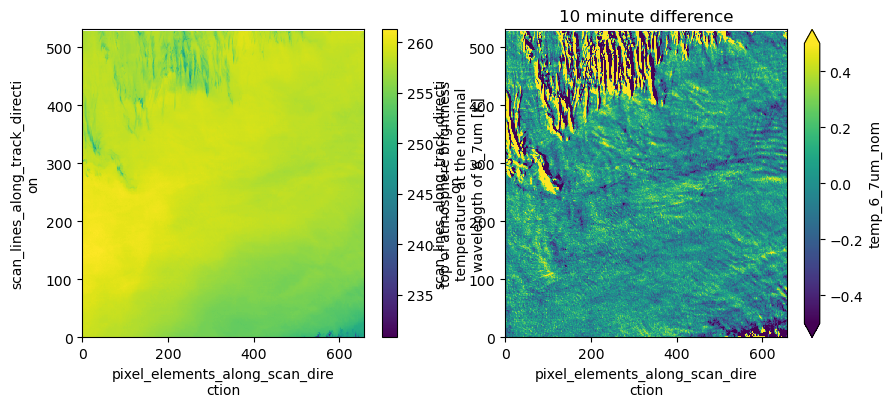

In [43]:
plt.figure(figsize=(10,4))
    
plt.subplot(121)
ds.temp_6_7um_nom.plot()
plt.subplot(122)
diff10.temp_6_7um_nom.plot(vmin=-0.5,vmax=0.5);plt.title('10 minute difference')


In [44]:
ds2 = xr.open_dataset('/Users/bmapes/Box/scwaves/EUREC4A_SATELLITE/GOES-E/2km_10min/2020_02_02/clavrx_OR_ABI-L1b-RadF-M6C01_G16_s20200330020138_BARBADOS-2KM-FD.level2.nc')
diff20 = ds2-ds

/Users/bmapes/miniconda3/envs/ATM651_arm64/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/bmapes/miniconda3/envs/ATM651_arm64/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


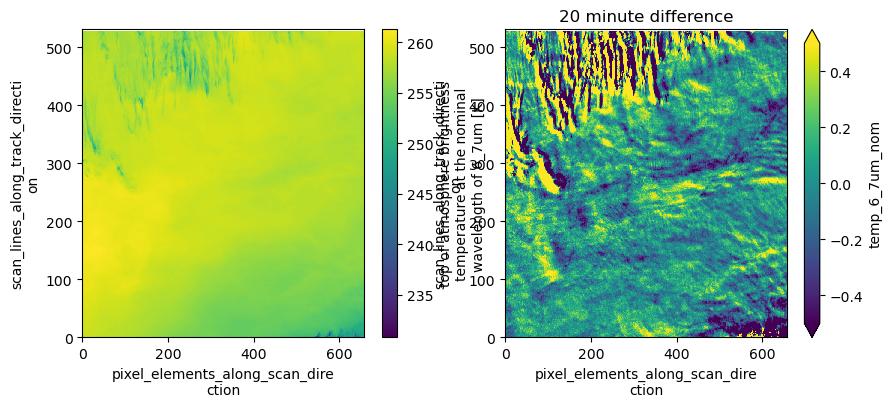

In [51]:
plt.figure(figsize=(10,4))
    
plt.subplot(121)
ds.temp_6_7um_nom.plot();
plt.subplot(122)
diff20.temp_6_7um_nom.plot(vmin=-0.5,vmax=0.5);plt.title('20 minute difference');
#diff10.temp_6_7um_nom.plot.contour(levels=[-1,0,1]);

In [24]:
ds2015 = xr.open_dataset('/Users/bmapes/Box/scwaves/g15.20150717.5km_folder/g15.2015198.2000.nc')
ds2015 

<xarray.Dataset>
Dimensions:     (time: 1, latitude: 1024, longitude: 1024)
Coordinates:
  * latitude    (latitude) float32 59.74 59.71 59.67 59.64 ... 9.973 9.91 9.848
  * longitude   (longitude) float32 -172.5 -172.5 -172.4 ... -107.5 -107.5
  * time        (time) timedelta64[ns] 16633 days 20:00:00
Data variables:
    gvar_ch1    (time, latitude, longitude) float32 ...
    gvar_ch2    (time, latitude, longitude) float32 ...
    gvar_ch3    (time, latitude, longitude) float32 ...
    gvar_ch4    (time, latitude, longitude) float32 ...
    gvar_ch6    (time, latitude, longitude) float32 ...
    sun_zenith  (latitude, longitude) float32 ...
Attributes: (12/70)
    projection:             6
    et_affine:              [-1.81818182e-01  0.00000000e+00  0.00000000e+00 ...
    projection_name:        mercator
    satellite:              goes-15
    sensor:                 12
    sensor_name:            gvissr
    ...                     ...
    longitude\coord:        x
    longitude\scale:        1.0
    longitude\offset:       0.0
    time\coord:             u
    time\scale:             1.0
    time\offset:            0.0

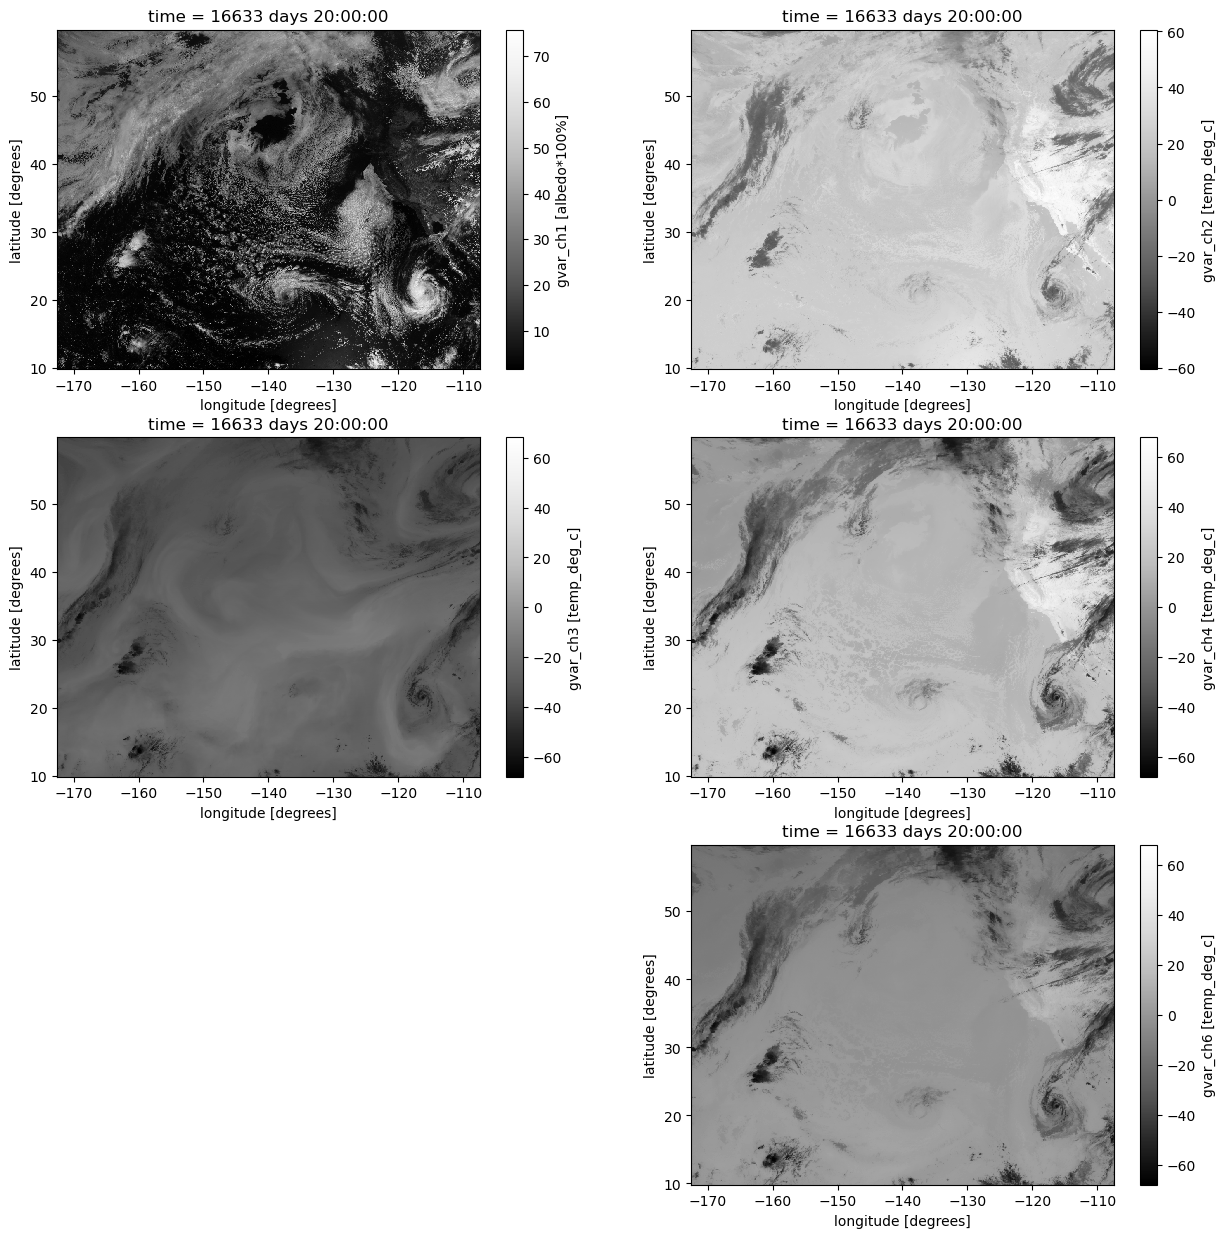

In [25]:
# Nice and clean, lat-long grid and 1024x1024 

plt.figure( figsize=[15,15] )

for i in [1,2,3,4,6]:
    plt.subplot(3,2,i)
    plotstr = 'ds2015.gvar_ch'+str(i)+".plot(cmap='Greys_r')"
    exec(plotstr)

# EUREC4A: on scanline coordinate, with lat-lon as data fields 

531x658 pixels, wayyyy too many fields 

In [64]:
!ls /Users/bmapes/Box/EUREC4A_SATELLITE/GOES-E/2km_10min/ #202*/*nc

2020_01_22 2020_01_27 2020_02_01 2020_02_06 2020_02_11 2020_02_16 2020_02_21
2020_01_23 2020_01_28 2020_02_02 2020_02_07 2020_02_12 2020_02_17 2020_02_22
2020_01_24 2020_01_29 2020_02_03 2020_02_08 2020_02_13 2020_02_18 2020_02_23
2020_01_25 2020_01_30 2020_02_04 2020_02_09 2020_02_14 2020_02_19 2020_02_24
2020_01_26 2020_01_31 2020_02_05 2020_02_10 2020_02_15 2020_02_20


In [45]:
# one random file  
file='/Users/bmapes/Box/EUREC4A_SATELLITE/GOES-E/2km_10min/2020_01_22/clavrx_OR_ABI-L1b-RadF-M6C01_G16_s20200221920165_BARBADOS-2KM-FD.level2.nc'

In [46]:
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:                            (scan_lines_along_track_direction: 531,
                                        pixel_elements_along_scan_direction: 658,
                                        the_third_dimension: 500)
Coordinates:
    latitude                           (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    longitude                          (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
Dimensions without coordinates: scan_lines_along_track_direction,
                                pixel_elements_along_scan_direction,
                                the_third_dimension
Data variables: (12/93)
    scan_line_number                   (scan_lines_along_track_direction) float64 ...
    scan_line_time                     (scan_lines_along_track_direction) timedelta64[ns] ...
    bad_pixel_mask                     (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    latitude_pc                        (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    longitude_pc                       (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    sensor_zenith_angle                (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    ...                                 ...
    cld_reff_dcomp_2                   (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    cld_reff_dcomp_3                   (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    cld_cwp_dcomp                      (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    iwc_dcomp                          (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    lwc_dcomp                          (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
    cld_geo_thick                      (scan_lines_along_track_direction, pixel_elements_along_scan_direction) float32 ...
Attributes: (12/87)
    HDF_LIB_VERSION:                      unknown
    MACHINE:                              solar3.ssec.wisc.edu
    PROGLANG:                             F90
    date_created:                         2020-01-22T19:30:36+00:00
    product_version:                      v05r04
    summary:                               To add
    ...                                   ...
    NUMBER_OF_SCANS_LEVEL1B:              531
    NUMBER_OF_SCANS_LEVEL2:               531
    PROCESSING_TIME_MINUTES:              0.50525665
    NONCONFIDENT_CLOUD_MASK_FRACTION:     0.07414467
    ACHA_SUCCESS_FRACTION:                0.99948126
    DCOMP_SUCCESS_FRACTION:               0.9897981

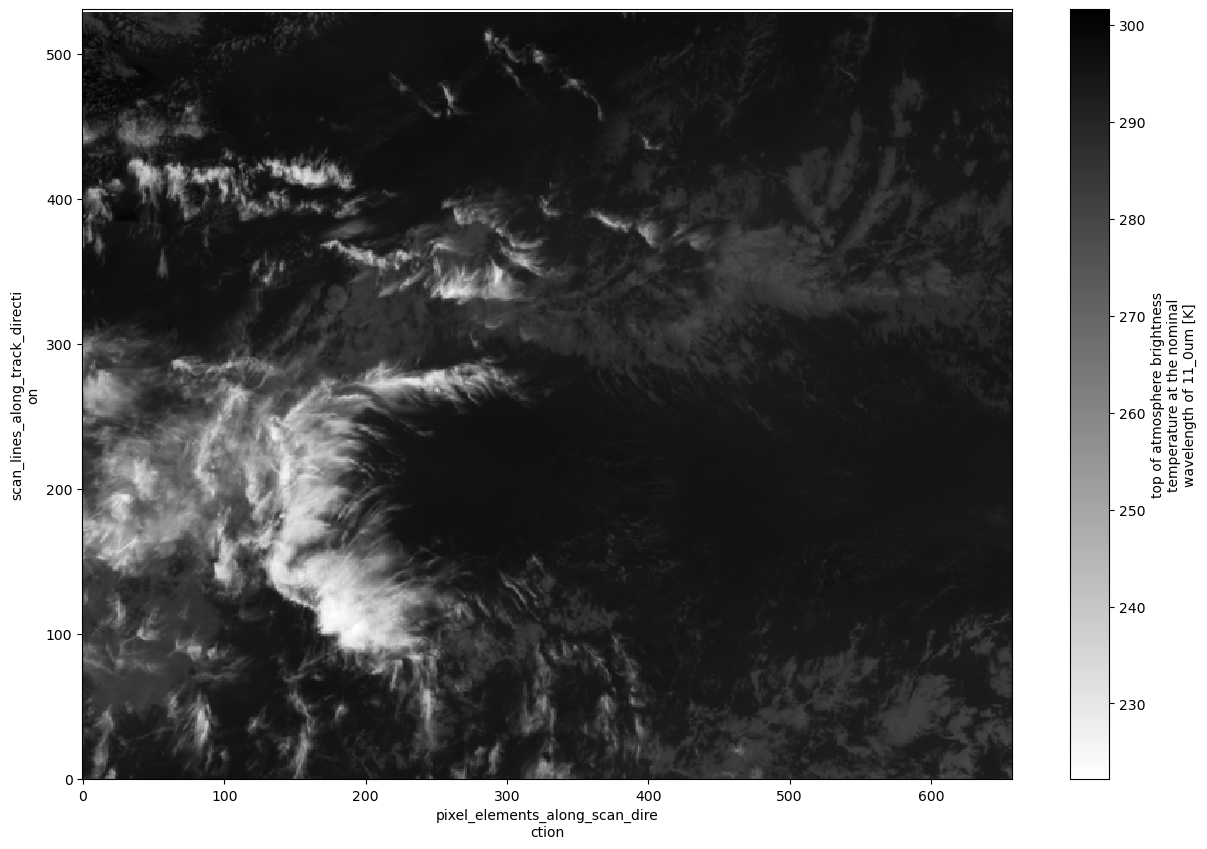

In [61]:
ds.temp_11_0um_nom.plot(cmap='gray_r', size=10,aspect=1.5)  # infrared 11micron window 

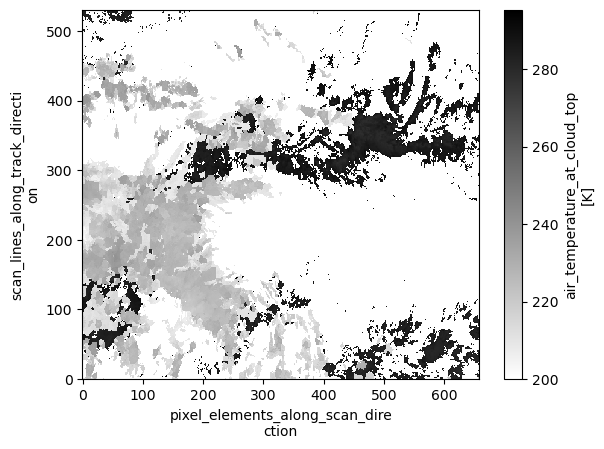

In [52]:
ds.cld_temp_acha.plot(cmap='gray_r')  # infrared 11micron window 

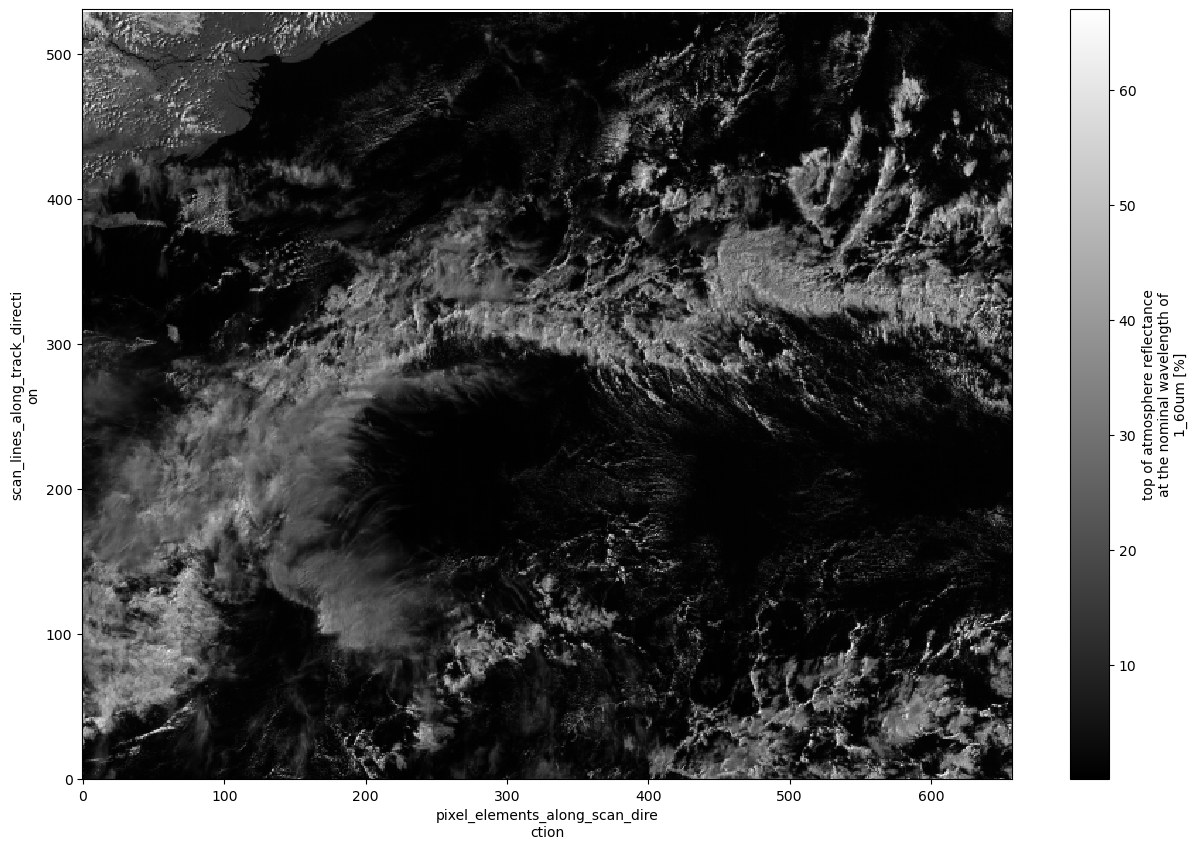

In [62]:
ds.refl_1_60um_nom.plot(cmap='gray', size=10, aspect=1.5)